## Build a Simple 2D CNN

Watch Full Video Here: https://youtu.be/GI7yim2NqGo

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 54kB/s 
     |████████████████████████████████| 4.3MB 37.7MB/s 
     |████████████████████████████████| 501kB 46.4MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf

In [5]:
print(tf.__version__)

2.0.0-rc0


In [0]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


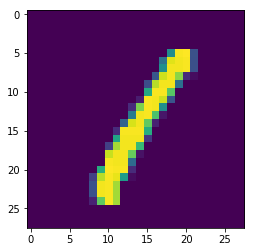

In [10]:
plt.imshow(X_train[3])

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [14]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [17]:
X_train[0].shape

(28, 28, 1)

In [0]:
input_shape = X_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size=128, epochs = 10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.2313 - accuracy: 0.9292 - val_loss: 0.0486 - val_accuracy: 0.9842
Epoch 2/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.0368 - val_accuracy: 0.9870
Epoch 3/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 4/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0326 - val_accuracy: 0.9888
Epoch 5/10
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 6/10
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 7/10
60000/60000 [==========================

In [27]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0282162455313317, 0.9913]

In [0]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

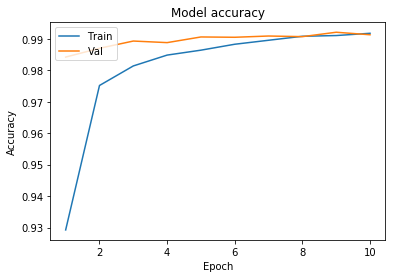

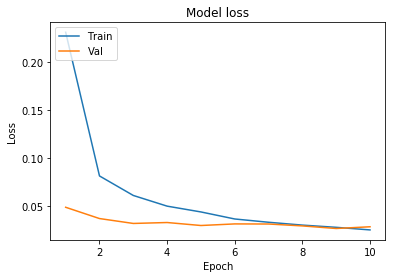

In [30]:
plot_learningCurve(history, 10)

In [28]:
history.history

{'accuracy': [0.9292333,
  0.9751667,
  0.9813833,
  0.98483336,
  0.9864,
  0.98828334,
  0.98955,
  0.99081665,
  0.99105,
  0.9917667],
 'loss': [0.23128813743988672,
  0.08127641623020172,
  0.06089144445856412,
  0.04974310937523842,
  0.04368485944370429,
  0.036338270604610444,
  0.032911906512081625,
  0.02995250391041239,
  0.027625102842599152,
  0.024926587708294392],
 'val_accuracy': [0.9842,
  0.987,
  0.9893,
  0.9888,
  0.9906,
  0.9905,
  0.9909,
  0.9907,
  0.9921,
  0.9913],
 'val_loss': [0.04856081557711586,
  0.03679117003520951,
  0.03167890572850592,
  0.032643665312696246,
  0.029529651030973766,
  0.031194648589240388,
  0.031091363168365204,
  0.029101395731511003,
  0.02641167245140823,
  0.02821624405810144]}